#Predicting Bus Passengers: Implementing Prophet Model

Simple implementation exploratory data analysis and of Meta's Prophet model for timeseries predictive forecasting. The purpose is to predict the next 2 year's worth of bus passengers in monthly increments

Link to Meta Prophet's model documentation: https://facebook.github.io/prophet/

In [3]:
#Make sure to install Prophet is  you haven't already done so

!pip install prophet

In [11]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import seaborn as sns

In [5]:
# Loading dataset
data = pd.read_csv('passenger-data.csv')

##Data Prep

In [6]:
# Convert 'Month' column to datetime and sorting in ascending order
if 'Month' in data.columns:
    data['Month'] = pd.to_datetime(data['Month'])
    data.sort_values('Month', inplace=True)


##Exploratory Data Analysis (EDA)

This step is to learn more about our dataset. This step we will do some simple statistics and create some simple visualizations as an inital step

In [7]:
# Display basic statistics
print(data.describe())

                     Month  Passengers
count                  144  144.000000
mean   2017-12-15 23:00:00  280.298611
min    2012-01-01 00:00:00  104.000000
25%    2014-12-24 06:00:00  180.000000
50%    2017-12-16 12:00:00  265.500000
75%    2020-12-08 18:00:00  360.500000
max    2023-12-01 00:00:00  622.000000
std                    NaN  119.966317


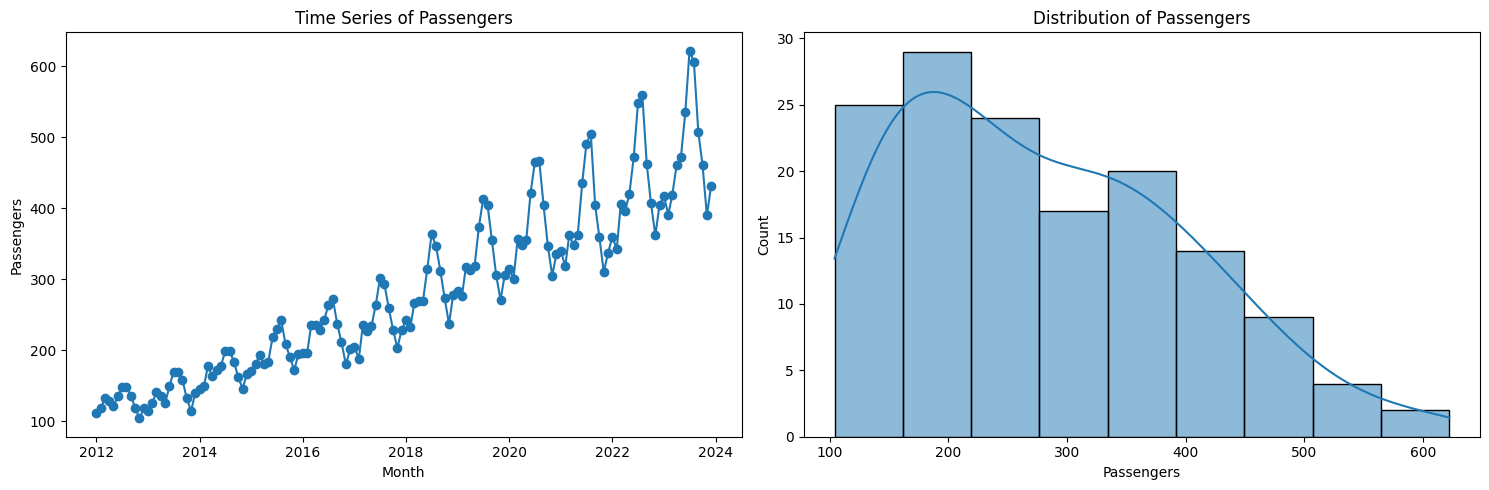

In [12]:
# Visualizations
plt.figure(figsize=(15, 5))
# Time Series Plot
if 'Month' in data.columns and 'Passengers' in data.columns:
    plt.subplot(1, 2, 1)
    plt.plot(data['Month'], data['Passengers'], marker='o', linestyle='-')
    plt.title('Time Series of Passengers')
    plt.xlabel('Month')
    plt.ylabel('Passengers')

# Histogram of Passengers
if 'Passengers' in data.columns:
    plt.subplot(1, 2, 2)
    sns.histplot(data['Passengers'], kde=True)
    plt.title('Distribution of Passengers')

plt.tight_layout()
plt.show()


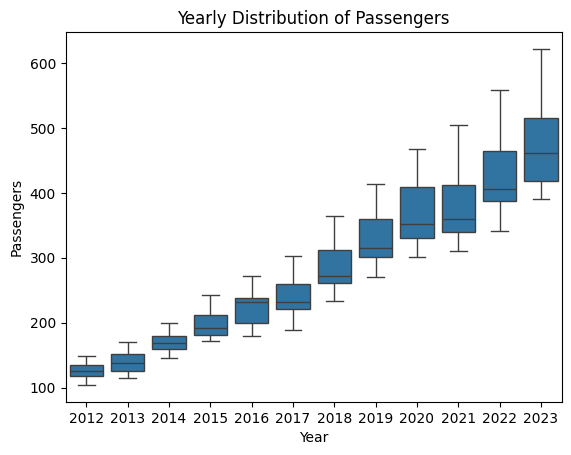

In [13]:
#Boxplot by Year
if 'Month' in data.columns:
    data['Year'] = data['Month'].dt.year
    sns.boxplot(x='Year', y='Passengers', data=data)
    plt.title('Yearly Distribution of Passengers')
    plt.show()

##Implementing Prophet Model

In [14]:
# To implement the prophet model, it is necessary to have time-series data columns labeled as 'ds' (date/timestamp) and 'y' (your dependent and independent variables)
#changing dataframe labels to match what is needed for prophet model (ds, y)

# Prepare the data
data['ds'] = pd.to_datetime(data['Month'])
data['y'] = data['Passengers']
data_prophet = data.drop(columns=['Month'])


In [15]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(data_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4nejk3h/cu1ircuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4nejk3h/lq8pra5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92464', 'data', 'file=/tmp/tmpy4nejk3h/cu1ircuk.json', 'init=/tmp/tmpy4nejk3h/lq8pra5m.json', 'output', 'file=/tmp/tmpy4nejk3h/prophet_models2seem8m/prophet_model-20240426162824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
# Create future dataframe for prediction, we are going to predict the next 2 years, which is 24 mornths
future = model.make_future_dataframe(periods=24, freq='M')

In [17]:
# Make predictions
forecast = model.predict(future)

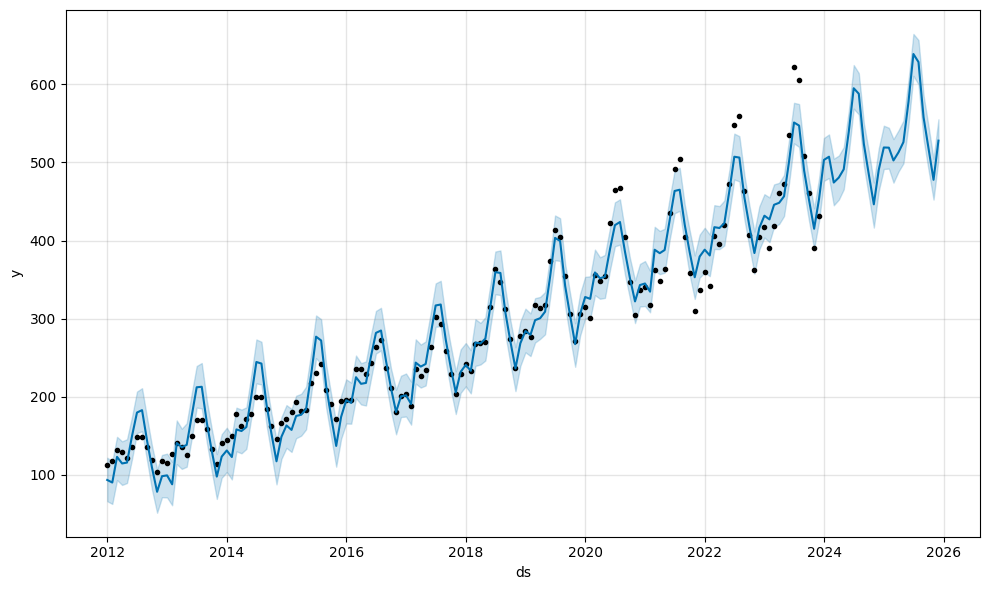

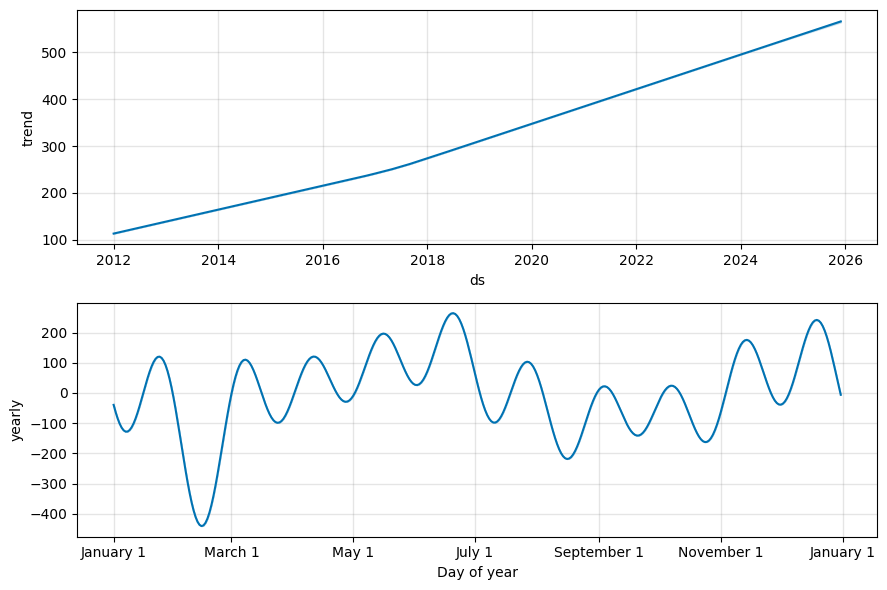

In [19]:
# Plot the forecast, showing prediction visualizations
fig_forecast = model.plot(forecast)
fig_components = model.plot_components(forecast)

#Change Point Analysis


Change point analysis is a statistical method used to determine the points where the probability distribution of a time series changes. This technique is valuable for identifying shifts in patterns within sequential data, which may signify events like a system failure, economic shift, or changes in consumer behavior.

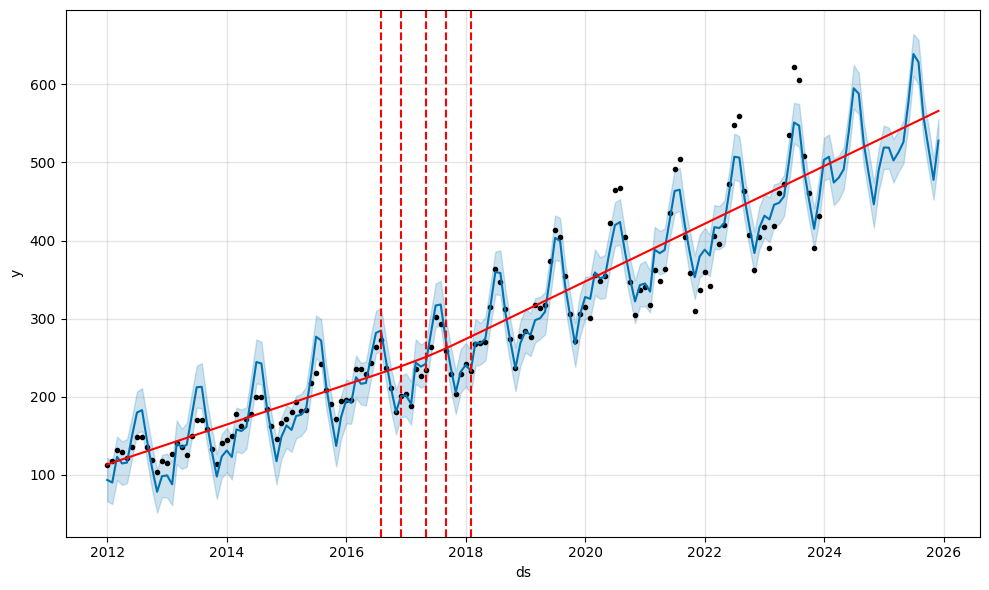

In [20]:
# Change point analysis
fig_cp = model.plot(forecast)
add_changepoints_to_plot(fig_cp.gca(), model, forecast)

# Show plots
plt.show()